# Compare the results of the different methods

## Create folder for results

In [59]:
import os

save_dir = "results"
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

## Import the data

In [60]:
import pandas as pd
import numpy as np

df1 = pd.read_csv('../results/SystemOne_read_write.csv')
df1['system'] = 'ReductStore'

df2 = pd.read_csv('../results/SystemTwo_read_write.csv')
df2['system'] = 'MinIO + InfluxDB'

df3 = pd.read_csv('../results/SystemOne_batch_read.csv')
df3['system'] = 'ReductStore'

df4 = pd.read_csv('../results/SystemTwo_batch_read.csv')
df4['system'] = 'MinIO + InfluxDB'

df = pd.concat([df1, df2, df3, df4])

## Clean the data

In [61]:
df['blob_size'] = df['blob_size'].astype('int')
df['system'] = df['system'].astype('category')
df['write_time'] = df['write_time'].astype('float')
df['read_time'] = df['read_time'].astype('float')
df['write_time_ms'] = df['write_time'] * 1000
df['read_time_ms'] = df['read_time'] * 1000

df.head()

,write_time,read_time,blob_size,batch_size,system,write_time_ms,read_time_ms
0,0.002315,0.001520,1024,1,ReductStore,2.315044,1.519918
1,0.003900,0.001457,1024,1,ReductStore,3.899813,1.456976
2,0.001677,0.001014,1024,1,ReductStore,1.677036,1.013994
3,0.001692,0.001306,1024,1,ReductStore,1.692057,1.306057
4,0.001961,0.001949,1024,1,ReductStore,1.960754,1.948833


## Define utility function

In [62]:
def format_size_binary(size):
    size = int(size)
    if size >= 2**30:
        return f"{size // 2**30} GiB"
    elif size >= 2**20:
        return f"{size // 2**20} MiB"
    elif size >= 2**10:
        return f"{size // 2**10} KiB"
    else:
        return f"{size} B"

## Result for individual read and write operations

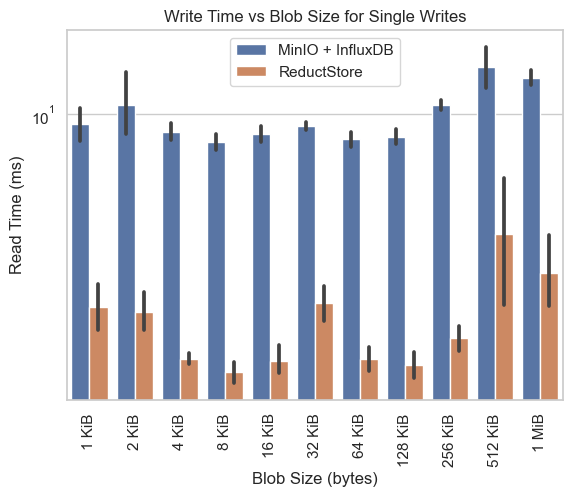

In [63]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
ax = sns.barplot(x="blob_size", y="write_time_ms", hue="system", data=df[df['batch_size'] == 1])

labels = [format_size_binary(item.get_text()) for item in ax.get_xticklabels()]
ax.set_xticklabels(labels,rotation=90)

ax.set_title('Write Time vs Blob Size for Single Writes')
ax.set_ylabel('Read Time (ms)')
ax.set_xlabel('Blob Size (bytes)')
ax.set_yscale('log')
ax.legend(loc='best')
plt.show()

fig = ax.get_figure()
fig.savefig(os.path.join(save_dir, 'single_write_time.png'), bbox_inches='tight', dpi=300)

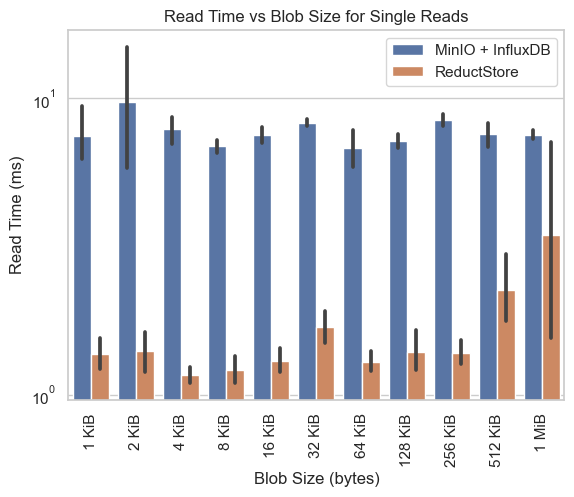

In [64]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
ax = sns.barplot(x="blob_size", y="read_time_ms", hue="system", data=df[df['batch_size'] == 1])

labels = [format_size_binary(item.get_text()) for item in ax.get_xticklabels()]
ax.set_xticklabels(labels,rotation=90)

ax.set_title('Read Time vs Blob Size for Single Reads')
ax.set_ylabel('Read Time (ms)')
ax.set_xlabel('Blob Size (bytes)')
ax.set_yscale('log')
ax.legend(loc='best')
plt.show()

fig = ax.get_figure()
fig.savefig(os.path.join(save_dir, 'single_write_time.png'), bbox_inches='tight', dpi=300)

## Result for batch-read operations

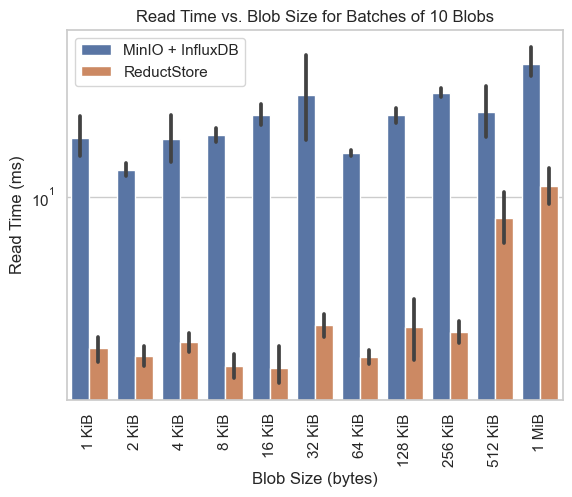

In [56]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
ax = sns.barplot(x="blob_size", y="read_time_ms", hue="system", data=df[df['batch_size'] == 10])

labels = [format_size_binary(item.get_text()) for item in ax.get_xticklabels()]
ax.set_xticklabels(labels,rotation=90)

ax.set_title('Read Time vs. Blob Size for Batches of 10 Blobs')
ax.set_ylabel('Read Time (ms)')
ax.set_xlabel('Blob Size (bytes)')
ax.set_yscale('log')
ax.legend(loc='best')
plt.show()

fig = ax.get_figure()
fig.savefig(os.path.join(save_dir, 'batch_read_time.png'), bbox_inches='tight', dpi=300)